# Business Understanding
memprediksi saham tesla dengan menggunakan module fbProphet buatan facebook dan bagaimana cara dan langkah menggunakannya ?



In [1]:
import warnings;
warnings.simplefilter('ignore')

# 1. Install and Import Dependencies

In [2]:
!pip install FbProphet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.5 MB/s 
  ERROR: Failed building wheel for FbProphet
  Running setup.py clean for FbProphet
Failed to build FbProphet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
    Running setup.py install for FbProphet ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-dlcxk0nr/fbprophet_c0a1b1f4b080493ab65280c3bb7f4f76/setup.py'"'"'; __file__='"'"'/tmp/pip-install-dlcxk0nr/fbprophet_c0a1b1f4b080493ab65280c3bb7f4f76/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.c

In [3]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 559 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [4]:
# Codingan dibawah ini berfungsi untuk import library / ngambil kodingan dari orang lain

import pandas as pd # Untuk mengolah data
import numpy as np # Untuk mengolah angka
import matplotlib.pylab as plt # Untuk visualisasi
import seaborn as sns # Untuk Visualisasi
import yfinance as yf # Untuk ambil dataset
%matplotlib inline
from datetime import datetime #Untuk mengatasi tipe data tanggal
import prophet as Prophet

# 2. Read In Data and Preprocessing with Time Series

In [5]:
# Kita ingin import data

df = yf.download('TSLA')

[*********************100%***********************]  1 of 1 completed


In [6]:
# Kita ingin menampilkan data yang sudah di import

df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2022-10-17,210.039993,221.860001,209.449997,219.350006,219.350006,79428800
2022-10-18,229.500000,229.820007,217.250000,220.190002,220.190002,75891900
2022-10-19,219.800003,222.929993,217.779999,222.039993,222.039993,66571500


In [7]:
# Kita ngin mengetahui informasi (tipe data dan missing value) dari masing-masing kolom
df.info()

# Reset index df
df = df.reset_index()

df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3102 entries, 2010-06-29 to 2022-10-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3102 non-null   float64
 1   High       3102 non-null   float64
 2   Low        3102 non-null   float64
 3   Close      3102 non-null   float64
 4   Adj Close  3102 non-null   float64
 5   Volume     3102 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 169.6 KB


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3097,2022-10-17,210.039993,221.860001,209.449997,219.350006,219.350006,79428800
3098,2022-10-18,229.500000,229.820007,217.250000,220.190002,220.190002,75891900
3099,2022-10-19,219.800003,222.929993,217.779999,222.039993,222.039993,66571500
3100,2022-10-20,208.279999,215.550003,202.000000,207.279999,207.279999,117798100


In [8]:
# Akhir periode
end = df['Date'].max()

In [9]:
# Kita ingin mengubah tipe data di kolom 'Month' dari object menjadi datetime
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

In [10]:
# Kita ingin cek data yang duplicate
df[df['Date'].duplicated()]

,Date,Open,High,Low,Close,Adj Close,Volume


In [11]:
# Kita ngin mengetahui informasi (tipe data dan missing value) dari masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3102 non-null   datetime64[ns]
 1   Open       3102 non-null   float64       
 2   High       3102 non-null   float64       
 3   Low        3102 non-null   float64       
 4   Close      3102 non-null   float64       
 5   Adj Close  3102 non-null   float64       
 6   Volume     3102 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 169.8 KB


In [12]:
# data['Date']=pd.to_datetime(data['Date'], infer_datetime_format=True)

In [13]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...,...
3097,2022-10-17,210.039993,221.860001,209.449997,219.350006,219.350006,79428800
3098,2022-10-18,229.500000,229.820007,217.250000,220.190002,220.190002,75891900
3099,2022-10-19,219.800003,222.929993,217.779999,222.039993,222.039993,66571500
3100,2022-10-20,208.279999,215.550003,202.000000,207.279999,207.279999,117798100


In [14]:
# Kolom yang berisi tanggal kita jadikan sebagai index
df=df.set_index(['Date'])
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2022-10-17,210.039993,221.860001,209.449997,219.350006,219.350006,79428800
2022-10-18,229.500000,229.820007,217.250000,220.190002,220.190002,75891900
2022-10-19,219.800003,222.929993,217.779999,222.039993,222.039993,66571500


In [15]:
df = df.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis=1)

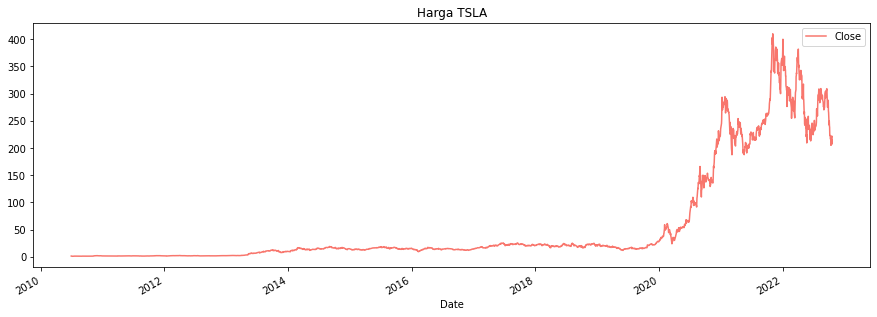

In [16]:
# Kita akan visualisasi data time-seriesnya

# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
df.plot(style='-', figsize=(15,5), color=color_pal[0], title="Harga TSLA")
plt.show()

In [17]:
# Membagi data kita menjadi data latih (data_train) dan data uji (data_test)

# Jika datanya kecil (ratusan jumlah datanya) pakai 0.2 
# Jika datanya sedang (ribuan jumlah datanya) pakai 0.15
# Jika datanya banyak (jutaan jumlah datanya) pakai 0.1
test_ratio = 0.15

test_set_size = int(len(df) * test_ratio)
df_train = df[0:-test_set_size].copy()
df_test = df[-test_set_size:].copy()

In [18]:
test_set_size

465

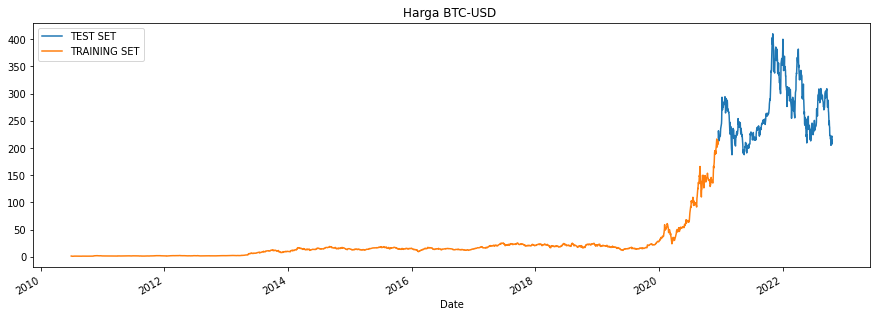

In [19]:
# Melihat hasil pembagian data kita menggunakan visualisasi
df_test \
    .rename(columns={'Close': 'TEST SET'}) \
    .join(df_train.rename(columns={'Close': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title="Harga BTC-USD ", style='-')
plt.show()

In [20]:
# Import Library yang akan digunakan untuk memprediksi Time-Series (FbProphet)

from prophet import Prophet

In [21]:
df_train

,Close
Date,
2010-06-29,1.592667
2010-06-30,1.588667
2010-07-01,1.464000
2010-07-02,1.280000
2010-07-06,1.074000
...,...
2020-12-10,209.023331
2020-12-11,203.330002
2020-12-14,213.276672


In [22]:
# Mengembalikan kolom Month ke bentuk semula (sebelum jadi index)
df_train.reset_index(inplace = True)

In [23]:
df_train

,Date,Close
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
2632,2020-12-10,209.023331
2633,2020-12-11,203.330002
2634,2020-12-14,213.276672
2635,2020-12-15,211.083328


In [24]:
# Mengubah nama kolom sesuai dengan anturan dari FBProphet
df_train.rename(columns={'Date':'ds', 'Close':'y'}, inplace = True)

In [25]:
df_train

,ds,y
0,2010-06-29,1.592667
1,2010-06-30,1.588667
2,2010-07-01,1.464000
3,2010-07-02,1.280000
4,2010-07-06,1.074000
...,...,...
2632,2020-12-10,209.023331
2633,2020-12-11,203.330002
2634,2020-12-14,213.276672
2635,2020-12-15,211.083328


In [26]:
# Preprocessing untuk menggunakan Prophet model ini untuk df_test

df_test.reset_index(inplace = True)
df_test.rename(columns={'Date':'ds', 'Close':'y'}, inplace = True)
    
df_test

,ds,y
0,2020-12-17,218.633331
1,2020-12-18,231.666672
2,2020-12-21,216.619995
3,2020-12-22,213.446671
4,2020-12-23,215.326660
...,...,...
460,2022-10-17,219.350006
461,2022-10-18,220.190002
462,2022-10-19,222.039993
463,2022-10-20,207.279999


# 3. Train Model

In [27]:
# Kita panggil model FbProphetnya

model = Prophet()

In [28]:
# Kita ingin melatih model machine learning kita
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


# 4. Train Time Series Model Using Prophet

In [29]:
# Kita ingin memprediksi menggunakan model machine learning kita
hasil_prediksi = model.predict(df_test)

In [30]:
hasil_prediksi

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-17,113.555227,99.310852,133.205741,113.555227,113.555227,2.527888,2.527888,2.527888,-0.356652,-0.356652,-0.356652,2.884540,2.884540,2.884540,0.0,0.0,0.0,116.083115
1,2020-12-18,113.706040,98.843244,133.617191,113.706040,113.706040,1.906150,1.906150,1.906150,-0.434138,-0.434138,-0.434138,2.340288,2.340288,2.340288,0.0,0.0,0.0,115.612189
2,2020-12-21,114.158479,97.409740,132.804142,114.158479,114.158479,0.520217,0.520217,0.520217,-0.202820,-0.202820,-0.202820,0.723037,0.723037,0.723037,0.0,0.0,0.0,114.678696
3,2020-12-22,114.309292,97.834402,132.223768,114.309292,114.309292,-0.059761,-0.059761,-0.059761,-0.272067,-0.272067,-0.272067,0.212307,0.212307,0.212307,0.0,0.0,0.0,114.249531
4,2020-12-23,114.460105,96.601861,131.090136,114.460105,114.460105,-0.422010,-0.422010,-0.422010,-0.148497,-0.148497,-0.148497,-0.273513,-0.273513,-0.273513,0.0,0.0,0.0,114.038094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460,2022-10-17,214.449132,189.617239,244.245626,193.280811,235.253853,2.402306,2.402306,2.402306,-0.202820,-0.202820,-0.202820,2.605126,2.605126,2.605126,0.0,0.0,0.0,216.851437
461,2022-10-18,214.599945,189.834874,246.116832,193.339219,235.442785,2.312174,2.312174,2.312174,-0.272067,-0.272067,-0.272067,2.584242,2.584242,2.584242,0.0,0.0,0.0,216.912119
462,2022-10-19,214.750758,188.879913,243.121632,193.397627,235.631717,2.414521,2.414521,2.414521,-0.148497,-0.148497,-0.148497,2.563019,2.563019,2.563019,0.0,0.0,0.0,217.165279
463,2022-10-20,214.901571,188.646589,245.211200,193.418085,235.820650,2.184189,2.184189,2.184189,-0.356652,-0.356652,-0.356652,2.540841,2.540841,2.540841,0.0,0.0,0.0,217.085759


In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [32]:
df_test['y']

0      218.633331
1      231.666672
2      216.619995
3      213.446671
4      215.326660
          ...    
460    219.350006
461    220.190002
462    222.039993
463    207.279999
464    214.440002
Name: y, Length: 465, dtype: float64

In [33]:
hasil_prediksi['yhat']

0      116.083115
1      115.612189
2      114.678696
3      114.249531
4      114.038094
          ...    
460    216.851437
461    216.912119
462    217.165279
463    217.085759
464    217.135298
Name: yhat, Length: 465, dtype: float64

In [34]:
mean_squared_error(df_test['y'], hasil_prediksi['yhat'])

13524.840636295841

In [35]:
mean_absolute_error(df_test['y'], hasil_prediksi['yhat'])

105.38709271679731

# 5. Data Visualisasi forecast fpProphet and Evaluate Model

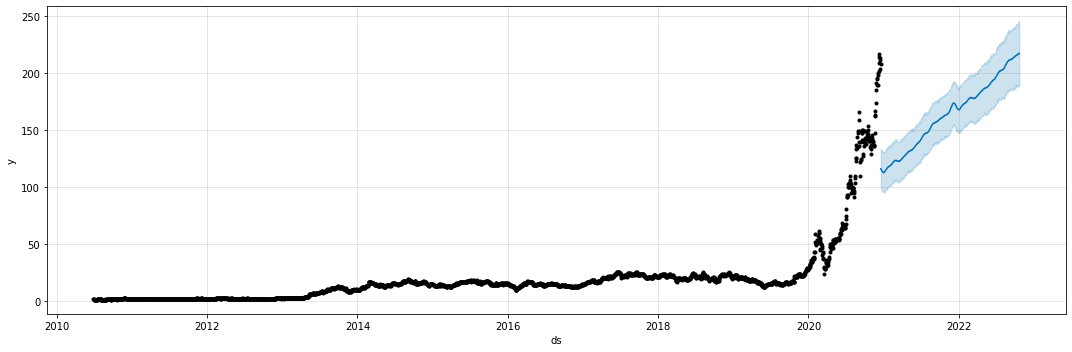

In [36]:
# Visualisai hasil prediksi machine learning

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(hasil_prediksi,
                 ax=ax)
plt.show()

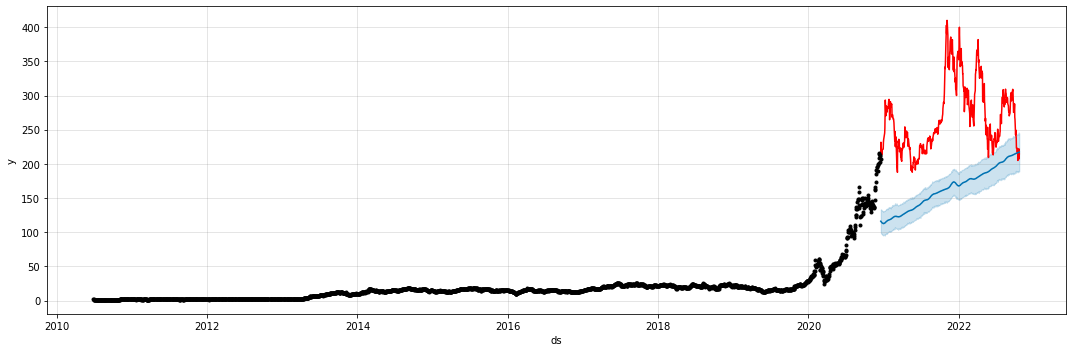

In [37]:
# Visualisasi perbandingan antara hasil prediksi machine learning dengan data yang asli
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(df_test['ds'], df_test['y'], color='r')
fig = model.plot(hasil_prediksi, ax=ax)

In [38]:
from prophet.plot import plot_plotly

plot_plotly(model, hasil_prediksi)

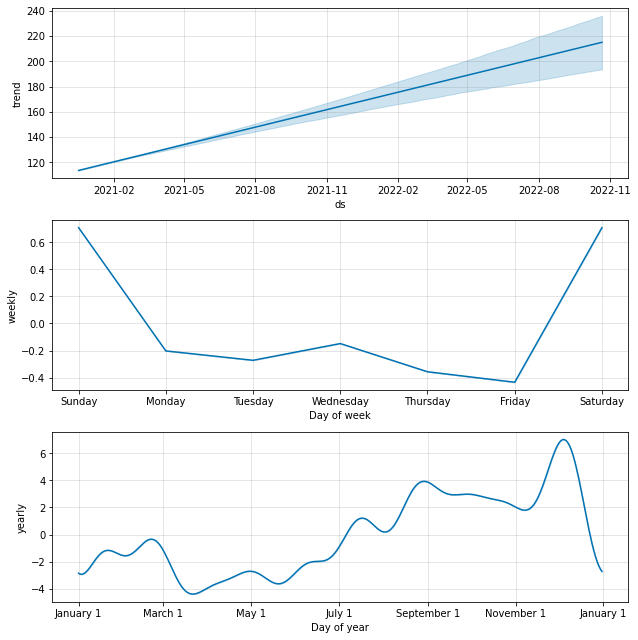

In [39]:

fig2 = model.plot_components(hasil_prediksi)

In [40]:
# Kita perlu ngebuat dataframe baru
prediksi_tahun_berikutnya = pd.DataFrame(columns=['ds', 'y'])

In [41]:
# Masukan tanggal yang kita inginkan untuk diprediksi

prediksi_tahun_berikutnya['ds'] = pd.date_range(start=end, periods=12, freq='MS')

In [42]:
prediksi_tahun_berikutnya

,ds,y
0,2022-11-01,NaN
1,2022-12-01,NaN
2,2023-01-01,NaN
3,2023-02-01,NaN
4,2023-03-01,NaN
5,2023-04-01,NaN
6,2023-05-01,NaN
7,2023-06-01,NaN
8,2023-07-01,NaN
9,2023-08-01,NaN


In [43]:
hasil_prediksi_satu_tahun_kedepan = model.predict(prediksi_tahun_berikutnya)

In [44]:
hasil_prediksi_satu_tahun_kedepan

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-11-01,216.711327,201.381915,236.090753,216.711327,216.711327,1.769053,1.769053,1.769053,-0.272067,-0.272067,-0.272067,2.041121,2.041121,2.041121,0.0,0.0,0.0,218.480380
1,2022-12-01,221.235717,210.219421,246.541971,220.982181,221.409221,6.331938,6.331938,6.331938,-0.356652,-0.356652,-0.356652,6.688591,6.688591,6.688591,0.0,0.0,0.0,227.567655
2,2023-01-01,225.910920,207.013770,241.423416,225.275841,226.459649,-2.096181,-2.096181,-2.096181,0.707088,0.707088,0.707088,-2.803269,-2.803269,-2.803269,0.0,0.0,0.0,223.814739
3,2023-02-01,230.586124,211.880868,246.902614,229.446551,231.600744,-1.680724,-1.680724,-1.680724,-0.148497,-0.148497,-0.148497,-1.532227,-1.532227,-1.532227,0.0,0.0,0.0,228.905400
4,2023-03-01,234.808888,217.874277,252.172725,233.152470,236.548927,-1.243055,-1.243055,-1.243055,-0.148497,-0.148497,-0.148497,-1.094558,-1.094558,-1.094558,0.0,0.0,0.0,233.565833
5,2023-04-01,239.484092,218.697351,253.157597,237.185403,241.943575,-3.237140,-3.237140,-3.237140,0.707087,0.707087,0.707087,-3.944228,-3.944228,-3.944228,0.0,0.0,0.0,236.246951
6,2023-05-01,244.008482,221.529382,258.431257,240.974966,247.399292,-2.903691,-2.903691,-2.903691,-0.202820,-0.202820,-0.202820,-2.700871,-2.700871,-2.700871,0.0,0.0,0.0,241.104791
7,2023-06-01,248.683685,227.962268,265.147901,244.773041,252.887459,-3.194550,-3.194550,-3.194550,-0.356652,-0.356652,-0.356652,-2.837898,-2.837898,-2.837898,0.0,0.0,0.0,245.489135
8,2023-07-01,253.208076,235.386274,272.035581,248.435573,258.558808,-0.312207,-0.312207,-0.312207,0.707087,0.707087,0.707087,-1.019294,-1.019294,-1.019294,0.0,0.0,0.0,252.895869
9,2023-08-01,257.883279,239.813037,276.623359,252.291126,264.408817,-0.059094,-0.059094,-0.059094,-0.272067,-0.272067,-0.272067,0.212974,0.212974,0.212974,0.0,0.0,0.0,257.824185


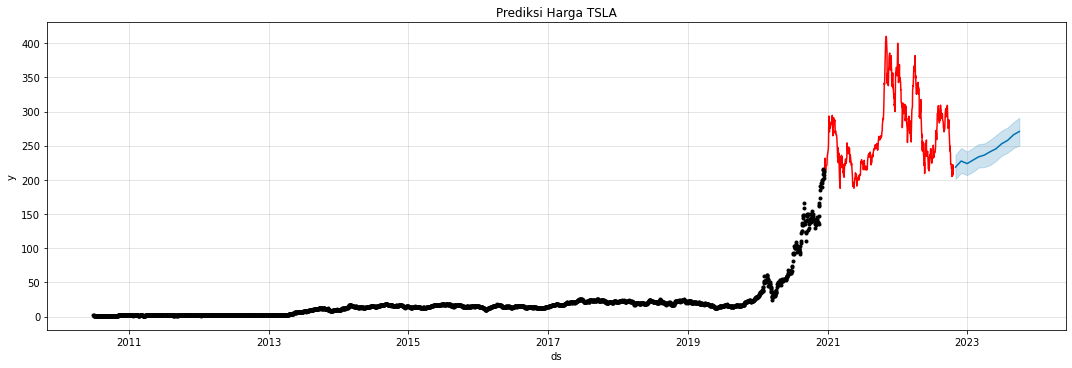

In [45]:
# Visualisai hasil prediksi machine learning

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(df_test['ds'], df_test['y'], color='r')
fig = model.plot(hasil_prediksi_satu_tahun_kedepan,
                 ax=ax)
fig = plt.title("Prediksi Harga TSLA")
plt.show()

# Conclusion
kesimpulan dan hasil yang didapatkan prediksi machine learning dengan menggunakan fbprophet sangat baik dalam membaca trend tapi kurang bagus untuk membaca turun naiknya harga saham dikarena data yang digunakan real data jadi tidak mencapai 100% akurasi

